In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Input ticker you want to obtain news for
ticker = 'SOXL'

In [6]:
# Obtain news per ticker
stock = finvizfinance(ticker)
news = stock.TickerNews()

In [14]:
news['Ticker'] = ticker
news.head()
news['Date']= pd.to_datetime(news['Date'])
news.to_csv('/Users/draganbogatic/Documents/Fin_Tech/finviz-stock-screen/resources/sentiment/SOXL.csv')

In [8]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores using vader
scores = news['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores = pd.DataFrame(scores)
scores.head()

,neg,neu,pos,compound
0,0.0,0.732,0.268,0.2960
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,0.488,0.512,0.6369
4,0.0,1.000,0.000,0.0000


In [9]:
sentiment = pd.concat([news, scores], join='inner', axis=1)
sentiment.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-03-09 10:00:00,ETF Odds & Ends: IAU Share Split & More,https://finance.yahoo.com/news/etf-odds-ends-i...,SOXL,0.0,0.732,0.268,0.2960
1,2021-02-08 09:30:00,ETF Odds & Ends: FANG+ ETNs Split,https://finance.yahoo.com/news/etf-odds-ends-f...,SOXL,0.0,1.000,0.000,0.0000
2,2020-07-10 11:04:00,"Chip stocks in focus, as NVDA surpasses INTC",https://finance.yahoo.com/video/chip-stocks-fo...,SOXL,0.0,1.000,0.000,0.0000
3,2020-06-29 10:45:00,Best Leveraged/Inverse ETFs of June,https://finance.yahoo.com/news/best-leveraged-...,SOXL,0.0,0.488,0.512,0.6369
4,2020-05-11 10:27:00,6 Leveraged ETFs Up At Least 25% Last Week,https://finance.yahoo.com/news/6-leveraged-etf...,SOXL,0.0,1.000,0.000,0.0000


In [10]:
sentiment.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.056510,0.813520,0.129960,0.080576
std,0.118514,0.202834,0.169525,0.321561
min,0.000000,0.238000,0.000000,-0.812600
25%,0.000000,0.687000,0.000000,0.000000
50%,0.000000,0.816000,0.000000,0.000000
75%,0.000000,1.000000,0.265750,0.225725
max,0.510000,1.000000,0.540000,0.735100


In [11]:
sentiment = sentiment.groupby('Ticker').mean()
sentiment

,neg,neu,pos,compound
Ticker,,,,
SOXL,0.05651,0.81352,0.12996,0.080576


<AxesSubplot:title={'center':'SOXL Sentiment Analysis'}, xlabel='Ticker', ylabel='sentiment'>

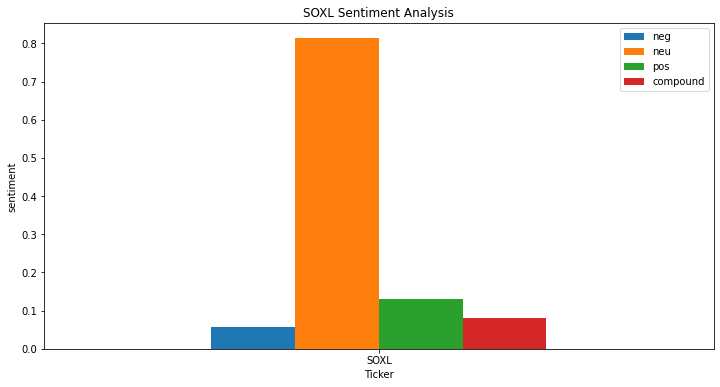

In [12]:
sentiment.plot.bar(figsize=(12,6),title=f'{ticker} Sentiment Analysis',ylabel='sentiment', rot=0)